# Midterm Assignment
Alexander Bedine  
ajb20dd@fsu.edu  
October 20, 2024  

# Table of Contents

 - [Environment Setup](#environment-setup)
   - [Installing Packages](#installing-packages)
   - [Importing Modules](#importing-modules)
   - [Importing Data](#importing-data)
 - [Dataset Manipulation](#dataset-manipulation)
   - [Creating Sub-DataFrames](#creating-sub-dataframes)
   - [Obtaining County Geography](#obtaining-county-geography)
   - [Merging Geographic Data](#merging-geographic-data)
 - [Health Outcomes](#health-outcomes)
   - [Observing Health Outcomes](#observing-health-outcomes)
   - [Natural Breaks Map](#natural-breaks-map)
   - [User Defined Map](#user-defined-maps)
   - [Hot- and Cold-Spot Maps](#hot--and-cold-spot-maps)
 - [Final Maps and Analysis](#final-maps-and-analysis)

## Environment Setup

### Installing Packages

In [6]:
#pip install geopandas

In [8]:
#pip install pysal

In [9]:
#pip install -q census

In [10]:
#pip install -q us

In [12]:
#pip install python-dotenv

In [124]:
#pip install mapclassify

Installing the packages that will be required for the work.

dotenv package is used to keep census key anonymized.

### Importing Modules

In [263]:
import os
from pathlib import Path
from dotenv import load_dotenv, dotenv_values
load_dotenv()

import pandas as pd
import geopandas as gpd
import numpy as np

from census import Census
import us

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

import mapclassify

from libpysal.weights.contiguity import Queen

import splot
from splot.esda import moran_scatterplot,plot_moran,lisa_cluster
from esda.moran import Moran, Moran_Local

Modules that will be necessary for the work.

### Importing Data

In [26]:
env_file_path = Path('c:/users/' + os.getlogin() + '/Documents/GIS5103 Git/GIS5103/.env')

Census_api = os.getenv('CENSUS_KEY')
#print(Census_api)  # Verify the key prints correctly

This step grabs our census API key in case it is necessary later.

In [27]:
census_20 = pd.read_csv("c:/users/" + os.getlogin() + '/Documents/GIS5103 Git/GIS5103/data/County_Data_2020.csv')
census_20.head()    # verifies the DataFrame loaded correctly

,StateAbbr,StateDesc,CountyName,CountyFIPS,TotalPopulation,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ACCESS2_AdjPrev,ACCESS2_Adj95CI,ARTHRITIS_CrudePrev,...,SLEEP_Adj95CI,STROKE_CrudePrev,STROKE_Crude95CI,STROKE_AdjPrev,STROKE_Adj95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,TEETHLOST_AdjPrev,TEETHLOST_Adj95CI,Geolocation
0,AL,Alabama,Autauga,1001,55601,13.8,"(11.6, 16.3)",14.3,"(12.0, 16.9)",32.5,...,"(36.8, 39.9)",3.8,"( 3.4, 4.2)",3.4,"( 3.0, 3.7)",16.1,"(10.7, 22.5)",16.3,"(10.8, 22.9)",POINT (-86.64301145 32.5350198)
1,AL,Alabama,Baldwin,1003,218022,12.9,"(10.6, 15.3)",13.6,"(11.2, 16.3)",33.2,...,"(34.8, 37.9)",3.8,"( 3.3, 4.3)",3.0,"( 2.6, 3.4)",13.1,"( 8.4, 18.9)",13.4,"( 8.4, 19.6)",POINT (-87.72275422 30.72811673)
2,AL,Alabama,Barbour,1005,24881,21.1,"(18.4, 24.0)",21.8,"(19.0, 24.8)",38.0,...,"(39.8, 42.0)",6.1,"( 5.6, 6.5)",5.1,"( 4.7, 5.5)",26.6,"(20.2, 32.9)",27.1,"(20.6, 33.3)",POINT (-85.39330307 31.86925212)
3,AL,Alabama,Bibb,1007,22400,16.9,"(14.6, 19.2)",17.3,"(14.8, 19.7)",33.7,...,"(38.8, 41.3)",4.3,"( 3.9, 4.7)",3.8,"( 3.5, 4.2)",20.2,"(15.1, 25.6)",20.7,"(15.3, 26.5)",POINT (-87.12653219 32.99854412)
4,AL,Alabama,Blount,1009,57840,16.3,"(13.6, 19.1)",17.0,"(14.3, 20.2)",35.0,...,"(37.3, 40.4)",4.2,"( 3.7, 4.7)",3.5,"( 3.1, 3.9)",19.0,"(12.9, 26.3)",19.3,"(13.2, 26.8)",POINT (-86.56784586 33.98070621)


Import the County Data from 2020 Census as a DataFrame ("**census_20**")

In [28]:
census_24 = pd.read_csv("c:/users/" + os.getlogin() + '/Documents/GIS5103 Git/GIS5103/data/County_Data_2024.csv')
census_24.head()    # verifies the DataFrame loaded correctly

,StateAbbr,StateDesc,CountyName,CountyFIPS,TotalPopulation,TotalPop18plus,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ACCESS2_AdjPrev,ACCESS2_Adj95CI,...,SHUTUTILITY_Adj95CI,LACKTRPT_CrudePrev,LACKTRPT_Crude95CI,LACKTRPT_AdjPrev,LACKTRPT_Adj95CI,EMOTIONSPT_CrudePrev,EMOTIONSPT_Crude95CI,EMOTIONSPT_AdjPrev,EMOTIONSPT_Adj95CI,Geolocation
0,SD,South Dakota,Yankton,46135,23373,18393,5.6,"( 4.9, 6.3)",7.7,"( 6.7, 8.6)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-97.3949292202413 43.0089434401039)
1,OK,Oklahoma,Haskell,40061,11641,8933,10.7,"( 9.5, 11.9)",14.1,"(12.4, 15.8)",...,"(11.1, 14.4)",11.1,"(10.0, 12.2)",12.0,"(10.8, 13.1)",25.3,"(21.5, 29.3)",26.0,"(22.2, 30.1)",POINT (-95.116494065308 35.224815744206)
2,IL,Illinois,Lake,17097,709150,546991,10.1,"( 9.0, 11.3)",10.4,"( 9.2, 11.7)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-88.003802278105 42.3231861408737)
3,KS,Kansas,Atchison,20005,16108,12602,7.2,"( 6.3, 8.2)",9.5,"( 8.4, 10.7)",...,"( 7.9, 10.2)",7.9,"( 7.2, 8.8)",8.3,"( 7.5, 9.2)",21.4,"(18.4, 24.7)",21.8,"(18.8, 25.2)",POINT (-95.3139519927859 39.5314729069169)
4,AK,Alaska,Anchorage,2020,287145,219637,7.7,"( 6.8, 8.6)",9.4,"( 8.3, 10.5)",...,"( 6.4, 8.2)",8.4,"( 7.6, 9.2)",8.4,"( 7.6, 9.2)",25.4,"(22.8, 28.0)",25.4,"(22.9, 28.1)",POINT (-149.112545841578 61.150482370682)


Import County Data from 2024 Census as a DataFrame ("**census_24**)

## Dataset Manipulation

### Creating Sub-DataFrames

In [46]:
MT = census_20["StateAbbr"] == "MT" # create a filter for the state of Montana.
MT_census_20 = census_20[MT]        # create a new DataFrame that uses Montana as a subset
#MT_census_20.head()                # verify the DataFrame prints as intended (full DataFrame contains 56 rows which lines up with MT's 56 counties)

In [45]:
# we are repeating the same steps as above to create an identical DataFrame for 2024 data

MT = census_24["StateAbbr"] == "MT"
MT_census_24 = census_24[MT]
#MT_census_24

We have now created two new DataFrames that are specifically looking at the state of Montana for our census data from 2020 and 2024.

### Obtaining County Geography

In [47]:
urls = us.states.MT.shapefile_urls()

urls.keys()

dict_keys(['tract', 'cd', 'county', 'state', 'zcta', 'block', 'blockgroup'])

In [48]:
urls['county']

'https://www2.census.gov/geo/tiger/TIGER2010/COUNTY/2010/tl_2010_30_county10.zip'

In [49]:
url = urls['county']

create a url variable that allows us to obtain the correct boundary files from TIGER 

<Axes: >

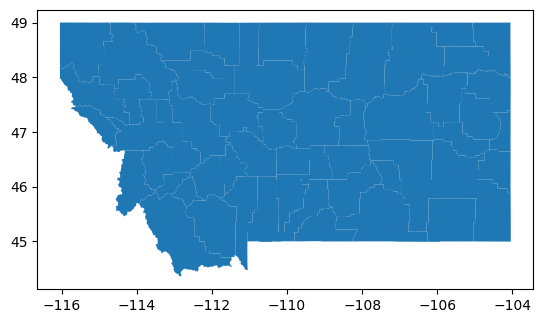

In [107]:
MT_county = gpd.read_file(url)
MT_county.plot()

plot the boundary files to check for errors

In [95]:
MT_county.crs   # check the crs of the boundary file, optionally we could modify the to_crs function from geopandas
                # we can use this website (https://epsg.io/) as a reference of crs codes. EPSG:4269 is NAD83.

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

### Merging Geographic Data

In [96]:
MT_census_20.head() # check the appearance of the census DataFrame to see where/how we should be merging the TIGER boundaries.

,StateAbbr,StateDesc,CountyName,CountyFIPS,TotalPopulation,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ACCESS2_AdjPrev,ACCESS2_Adj95CI,ARTHRITIS_CrudePrev,...,STROKE_CrudePrev,STROKE_Crude95CI,STROKE_AdjPrev,STROKE_Adj95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,TEETHLOST_AdjPrev,TEETHLOST_Adj95CI,Geolocation,GEOID10
1598,MT,Montana,Beaverhead,30001,9404,12.0,"( 9.9, 14.4)",12.8,"(10.6, 15.3)",27.0,...,3.6,"( 3.1, 4.1)",2.9,"( 2.6, 3.2)",13.2,"( 8.4, 18.4)",13.4,"( 8.6, 18.6)",POINT (-112.8987821 45.1325603),30001
1599,MT,Montana,Big Horn,30003,13338,15.6,"(13.7, 17.6)",16.0,"(14.0, 18.1)",28.1,...,5.3,"( 4.9, 5.8)",5.0,"( 4.6, 5.4)",25.6,"(20.3, 31.4)",26.3,"(21.0, 32.3)",POINT (-107.4899123 45.4232765),30003
1600,MT,Montana,Blaine,30005,6807,14.8,"(12.6, 17.0)",15.2,"(13.0, 17.5)",28.7,...,5.2,"( 4.8, 5.7)",4.6,"( 4.2, 5.0)",22.5,"(16.7, 28.5)",22.7,"(16.8, 28.7)",POINT (-108.9586743 48.43260231),30005
1601,MT,Montana,Broadwater,30007,6085,11.9,"( 9.7, 14.4)",13.0,"(10.5, 15.8)",30.5,...,3.9,"( 3.4, 4.5)",2.8,"( 2.5, 3.2)",13.6,"( 8.6, 19.2)",14.1,"( 9.1, 19.9)",POINT (-111.4960032 46.331789),30007
1602,MT,Montana,Carbon,30009,10714,10.7,"( 8.6, 13.3)",11.9,"( 9.5, 14.7)",32.7,...,3.8,"( 3.3, 4.4)",2.7,"( 2.4, 3.0)",12.8,"( 8.0, 18.4)",13.2,"( 8.3, 19.0)",POINT (-109.0294726 45.22735569),30009


In [97]:
MT_county.sort_values(by=['GEOID10']).head()   # verify that the counties match up correctly with the ones in the census dataframe, where GEOID10 = CountyFIPS

,STATEFP10,COUNTYFP10,COUNTYNS10,GEOID10,NAME10,NAMELSAD10,LSAD10,CLASSFP10,MTFCC10,CSAFP10,CBSAFP10,METDIVFP10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
25,30,001,01719627,30001,Beaverhead,Beaverhead County,06,H1,G4020,None,None,None,A,14352738393,78393828,+45.1338633,-112.8928694,"POLYGON ((-113.58459 45.15274, -113.58552 45.1..."
39,30,003,01716521,30003,Big Horn,Big Horn County,06,H1,G4020,None,None,None,A,12938188130,49593380,+45.4078690,-107.5181625,"POLYGON ((-107.00516 44.99639, -107.01136 44.9..."
40,30,005,01722470,30005,Blaine,Blaine County,06,H1,G4020,None,None,None,A,10949294445,29085813,+48.4282823,-108.9676475,"POLYGON ((-108.41126 48.44498, -108.41126 48.4..."
27,30,007,01719625,30007,Broadwater,Broadwater County,06,H1,G4020,None,None,None,A,3088667752,119697770,+46.3344755,-111.4961030,"POLYGON ((-111.63576 46.56912, -111.63442 46.5..."
18,30,009,01720111,30009,Carbon,Carbon County,06,H1,G4020,None,13740,None,A,5306336324,34640087,+45.2244745,-109.0285509,"POLYGON ((-109.22529 45.46439, -109.22442 45.4..."


In [110]:
MT_census_20_gdf = pd.merge(MT_county, MT_census_20,left_on="GEOID10", right_on="CountyFIPS")        # this merge fails... why?

ValueError: You are trying to merge on object and int64 columns for key 'GEOID10'. If you wish to proceed you should use pd.concat

In [99]:
MT_county["GEOID10"].dtype                   # check the data type of our columns we are trying to merge

dtype('O')

In [100]:
MT_census_20["CountyFIPS"].dtype

dtype('int64')

We are trying to merge two columns, but one is int64 datatype and one is an object datatype, so we need to fix this.

In [111]:
MT_county["GEOID10"] = pd.to_numeric(MT_county["GEOID10"])    # convert CountyFIPS column from MT_county DataFrame to integer datatype
MT_county["GEOID10"].dtype

dtype('int64')

now that we have converted our datatype from object to int64, we can try to merge the DataFrames again.

In [197]:
MT_census_20_gdf = pd.merge(MT_county, MT_census_20,left_on="GEOID10", right_on="CountyFIPS")   # this merge succeeds
MT_census_20_gdf.head()                                                                         # verify

,STATEFP10,COUNTYFP10,COUNTYNS10,GEOID10_x,NAME10,NAMELSAD10,LSAD10,CLASSFP10,MTFCC10,CSAFP10,...,STROKE_CrudePrev,STROKE_Crude95CI,STROKE_AdjPrev,STROKE_Adj95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,TEETHLOST_AdjPrev,TEETHLOST_Adj95CI,Geolocation,GEOID10_y
0,30,069,01719590,30069,Petroleum,Petroleum County,06,H1,G4020,None,...,4.0,"( 3.4, 4.5)",2.7,"( 2.4, 3.0)",12.9,"( 8.0, 18.0)",12.6,"( 7.8, 17.5)",POINT (-108.2501111 47.11706322),30069
1,30,073,01719587,30073,Pondera,Pondera County,06,H1,G4020,None,...,4.4,"( 3.9, 4.9)",3.4,"( 3.1, 3.7)",16.8,"(11.2, 23.1)",16.9,"(11.3, 22.8)",POINT (-112.2266817 48.22791028),30073
2,30,039,01719605,30039,Granite,Granite County,06,H1,G4020,None,...,4.4,"( 3.7, 5.0)",2.8,"( 2.5, 3.2)",13.5,"( 8.6, 19.6)",13.9,"( 8.8, 20.0)",POINT (-113.4397789 46.40491339),30039
3,30,067,01720027,30067,Park,Park County,06,H1,G4020,None,...,3.6,"( 3.1, 4.1)",2.7,"( 2.4, 3.1)",12.9,"( 8.3, 18.7)",13.4,"( 8.4, 19.4)",POINT (-110.5265753 45.48844999),30067
4,30,089,01719578,30089,Sanders,Sanders County,06,H1,G4020,None,...,5.7,"( 5.0, 6.5)",3.7,"( 3.3, 4.1)",20.5,"(14.2, 27.6)",21.2,"(14.5, 28.1)",POINT (-115.1351472 47.67525908),30089


Now we can repeat these steps with the 2024 census data.

In [114]:
MT_census_24_gdf = pd.merge(MT_county, MT_census_24,left_on="GEOID10", right_on="CountyFIPS")   # this merge succeeds
MT_census_24_gdf.head()                                                                         # verify

,STATEFP10,COUNTYFP10,COUNTYNS10,GEOID10,NAME10,NAMELSAD10,LSAD10,CLASSFP10,MTFCC10,CSAFP10,...,SHUTUTILITY_Adj95CI,LACKTRPT_CrudePrev,LACKTRPT_Crude95CI,LACKTRPT_AdjPrev,LACKTRPT_Adj95CI,EMOTIONSPT_CrudePrev,EMOTIONSPT_Crude95CI,EMOTIONSPT_AdjPrev,EMOTIONSPT_Adj95CI,Geolocation
0,30,069,01719590,30069,Petroleum,Petroleum County,06,H1,G4020,None,...,"( 5.9, 7.8)",5.9,"( 5.3, 6.5)",7.1,"( 6.4, 7.9)",19.9,"(16.9, 23.0)",21.7,"(18.6, 25.1)",POINT (-108.250390746347 47.1176566634975)
1,30,073,01719587,30073,Pondera,Pondera County,06,H1,G4020,None,...,"( 7.9, 10.4)",9.3,"( 8.4, 10.2)",10.2,"( 9.2, 11.2)",23.5,"(20.0, 27.0)",24.4,"(20.8, 28.0)",POINT (-112.22672285102 48.2279658725192)
2,30,039,01719605,30039,Granite,Granite County,06,H1,G4020,None,...,"( 6.4, 8.4)",7.0,"( 6.3, 7.8)",7.9,"( 7.2, 8.8)",21.8,"(18.6, 25.2)",22.2,"(19.0, 25.7)",POINT (-113.440260921517 46.4040577446116)
3,30,067,01720027,30067,Park,Park County,06,H1,G4020,None,...,"( 6.0, 7.8)",6.4,"( 5.8, 7.1)",7.3,"( 6.6, 8.0)",20.5,"(17.6, 23.5)",21.6,"(18.7, 24.8)",POINT (-110.52629655656 45.4881773935607)
4,30,089,01719578,30089,Sanders,Sanders County,06,H1,G4020,None,...,"( 7.1, 9.2)",7.4,"( 6.7, 8.2)",8.7,"( 7.9, 9.6)",21.2,"(18.3, 24.5)",22.4,"(19.4, 25.8)",POINT (-115.133410637731 47.67485749039)


## Health Outcomes

### Observing Health Outcomes

The below list is non-exhaustive and meant as an easy reference for the health outcomes *I* think would be interesting to look at.

- **ARTHRITIS_CrudePrev** is the estimate for the crude prevalence of arthritis among adults
- **BINGE_CrudePrev** is the estimate for crude prevalence of binge drinking among adults
- **CASTHMA_CrudePrev** is the estimate for crude prevalence of current asthma among adults
- ~~**COGNITION_CrudePrev** is the estimate for crude prevalence of cognitive disability among adults~~ This health outcome is missing from the 2020 census data, so we'll skip it

<Axes: >

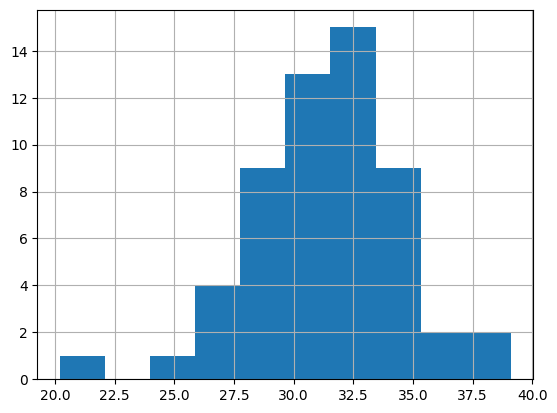

In [117]:
MT_census_20_gdf["ARTHRITIS_CrudePrev"].hist()

<Axes: >

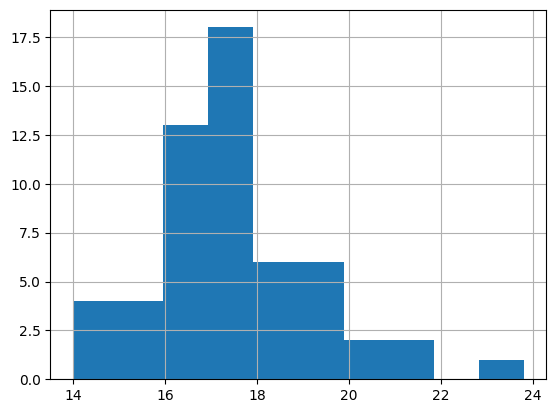

In [119]:
MT_census_20_gdf["BINGE_CrudePrev"].hist()

<Axes: >

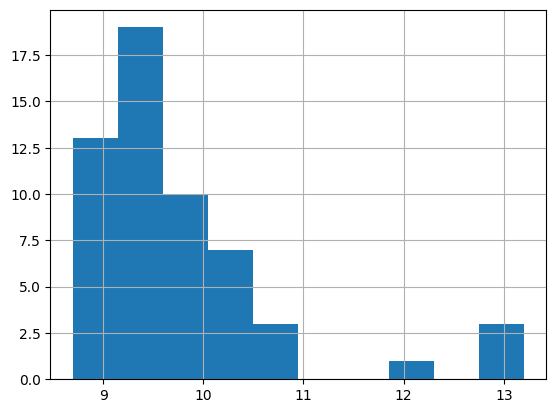

In [120]:
MT_census_20_gdf["CASTHMA_CrudePrev"].hist()

Based on the histograms above, I will use Arthritis as my preferred Health Outcome.

### Natural Breaks Map

In [198]:
classifier_nb = mapclassify.NaturalBreaks(MT_census_20_gdf["ARTHRITIS_CrudePrev"], k=5)       # create our classifier for a Natural Breaks map

MT_census_20_gdf["arthritis_rate_nb"] = classifier_nb.yb                                      # Apply this classifier to our data

In [199]:
# define a color map because I feel like it

hex_color = ['#f0f9e8',
'#bae4bc',
'#7bccc4',
'#43a2ca',
'#0868ac']

#hex_color.reverse()

# Create a custom colormap using ColorBrewer hex codes
my_cmap = ListedColormap(hex_color)

#my_cmap = plt.cm.Blues

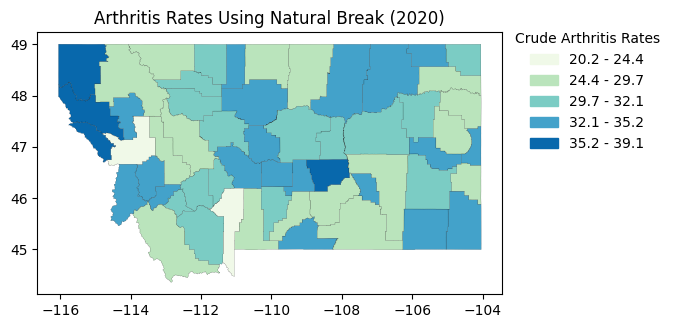

In [256]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
MT_census_20_gdf.plot(ax=ax, 
                      column="arthritis_rate_nb", 
                      linewidth=0.1, 
                      cmap=my_cmap, 
                      edgecolor="black",
                      missing_kwds={"color": "#FFFFFF", "edgecolor": "salmon", "hatch": "///", "label": "Missing values"}, 
                      legend=False)

legend_labels = [f"{round(lower, 2)} - {round(upper, 2)}" for lower, upper in zip([min(MT_census_20_gdf["ARTHRITIS_CrudePrev"])] + list(classifier_nb.bins[:-1]), classifier_nb.bins)]

norm = mpl.colors.Normalize(vmin=0, vmax=4)  # Assuming the value ranges from 0 to 4
normalized_value = norm(MT_census_20_gdf["ARTHRITIS_CrudePrev"])
patches = [mpatches.Patch(color=my_cmap(norm(i)), label=legend_labels[i]) for i in range(len(legend_labels))]

plt.legend(bbox_to_anchor=(1, 0.5), handles=patches, loc='lower left', title="Crude Arthritis Rates", frameon=False)
plt.title(f'Arthritis Rates Using Natural Break (2020)');

We have successfully created a Natural Breaks map for the Arthritis Rates in Montana for the 2020 census data, now we will repeat this with the 2024 data.

In [158]:
classifier_nb = mapclassify.NaturalBreaks(MT_census_24_gdf["ARTHRITIS_CrudePrev"], k=5)       # create our classifier for a Natural Breaks map

MT_census_24_gdf["arthritis_rate_nb"] = classifier_nb.yb                                      # Apply this classifier to our data

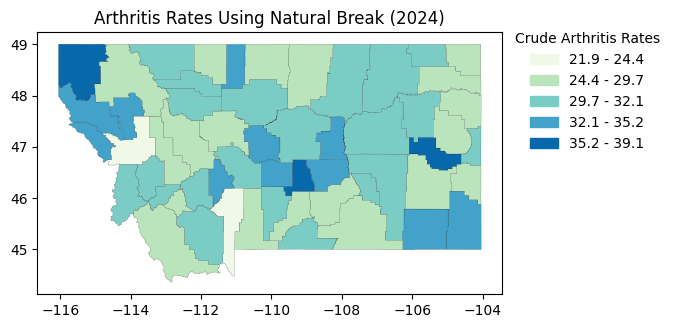

In [255]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
MT_census_24_gdf.plot(ax=ax, 
                      column="arthritis_rate_nb", 
                      linewidth=0.1, 
                      cmap=my_cmap, 
                      edgecolor="black",
                      missing_kwds={"color": "#FFFFFF", "edgecolor": "salmon", "hatch": "///", "label": "Missing values"}, 
                      legend=False)

legend_labels = [f"{round(lower, 2)} - {round(upper, 2)}" for lower, upper in zip([min(MT_census_24_gdf["ARTHRITIS_CrudePrev"])] + list(classifier_nb.bins[:-1]), classifier_nb.bins)]

norm = mpl.colors.Normalize(vmin=0, vmax=4)  # Assuming the value ranges from 0 to 4
normalized_value = norm(MT_census_24_gdf["ARTHRITIS_CrudePrev"])
patches = [mpatches.Patch(color=my_cmap(norm(i)), label=legend_labels[i]) for i in range(len(legend_labels))]

plt.legend(bbox_to_anchor=(1, 0.5), handles=patches, loc='lower left', title="Crude Arthritis Rates", frameon=False)
plt.title(f'Arthritis Rates Using Natural Break (2024)');

### User Defined Maps

Now that we have seen what data is generated using natural breaks, lets try to create our own user defined ranges to standardize the legend.

In [252]:
classifier_ud = mapclassify.UserDefined(y=MT_census_20_gdf["ARTHRITIS_CrudePrev"], bins=[24, 30, 34, 38])
MT_census_20_gdf["arthritis_rate_ud"] = classifier_ud.yb

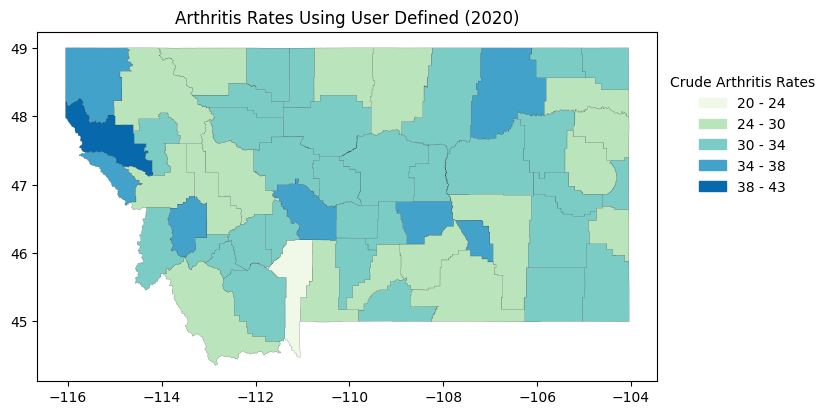

In [290]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
MT_census_20_gdf.plot(ax=ax, 
                      column="arthritis_rate_ud", 
                      linewidth=0.1, 
                      cmap=my_cmap, 
                      edgecolor="black",
                      missing_kwds={"color": "#FFFFFF", "edgecolor": "salmon", "hatch": "///", "label": "Missing values"}, 
                      legend=False)

bins = classifier_ud.bins

legend_labels = [f"{int(lower)} - {int(upper)}" for lower, upper in zip([min(MT_census_20_gdf["ARTHRITIS_CrudePrev"])] + list(classifier_ud.bins[:-1]), classifier_ud.bins)]

norm = mpl.colors.Normalize(vmin=0, vmax=4)  # Assuming the value ranges from 0 to 4
normalized_value = norm(MT_census_20_gdf["ARTHRITIS_CrudePrev"])
patches = [mpatches.Patch(color=my_cmap(norm(i)), label=legend_labels[i]) for i in range(len(legend_labels))]

plt.legend(bbox_to_anchor=(1, 0.5), handles=patches, loc='lower left', title="Crude Arthritis Rates", frameon=False)
plt.title(f'Arthritis Rates Using User Defined (2020)');

This is the map for 2020 census data.

In [257]:
classifier_ud = mapclassify.UserDefined(y=MT_census_24_gdf["ARTHRITIS_CrudePrev"], bins=[24, 30, 34, 38])
MT_census_24_gdf["arthritis_rate_ud"] = classifier_ud.yb

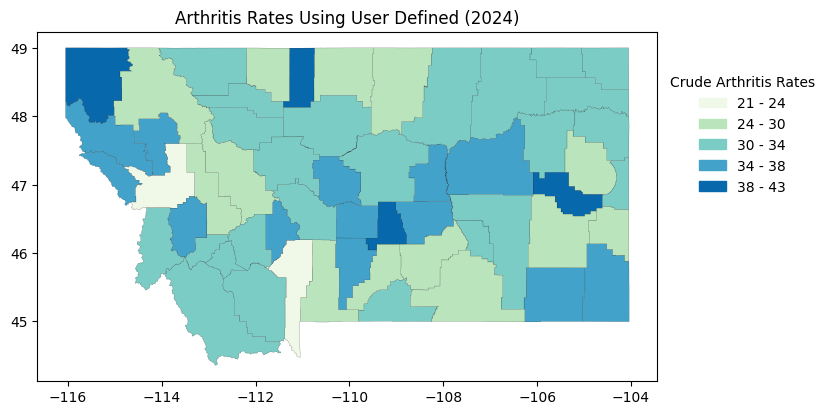

In [291]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
MT_census_24_gdf.plot(ax=ax, 
                      column="arthritis_rate_ud", 
                      linewidth=0.1, 
                      cmap=my_cmap, 
                      edgecolor="black",
                      missing_kwds={"color": "#FFFFFF", "edgecolor": "salmon", "hatch": "///", "label": "Missing values"}, 
                      legend=False)

bins = classifier_ud.bins

legend_labels = [f"{int(lower)} - {int(upper)}" for lower, upper in zip([min(MT_census_24_gdf["ARTHRITIS_CrudePrev"])] + list(classifier_ud.bins[:-1]), classifier_ud.bins)]

norm = mpl.colors.Normalize(vmin=0, vmax=4)  # Assuming the value ranges from 0 to 4
normalized_value = norm(MT_census_24_gdf["ARTHRITIS_CrudePrev"])
patches = [mpatches.Patch(color=my_cmap(norm(i)), label=legend_labels[i]) for i in range(len(legend_labels))]

plt.legend(bbox_to_anchor=(1, 0.5), handles=patches, loc='lower left', title="Crude Arthritis Rates", frameon=False)
plt.title(f'Arthritis Rates Using User Defined (2024)');

This is the map for 2024 census data.

### Hot- and Cold-Spot Maps

In [264]:
w_20 = Queen.from_dataframe(MT_census_20_gdf)
w_24 = Queen.from_dataframe(MT_census_24_gdf)

w_20.transform = 'r' #Row-standardization of the weight matrix
w_24.transform = 'r'

C:\Users\alexa\AppData\Local\Temp\ipykernel_77976\2791930473.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_20 = Queen.from_dataframe(MT_census_20_gdf)
C:\Users\alexa\AppData\Local\Temp\ipykernel_77976\2791930473.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_24 = Queen.from_dataframe(MT_census_24_gdf)


specify a weight matrix to use for the hot/cold spot maps

In [265]:
arth_rate_20 = MT_census_20_gdf["ARTHRITIS_CrudePrev"].values
arth_rate_24 = MT_census_24_gdf["ARTHRITIS_CrudePrev"].values

global_moran_20 = Moran(arth_rate_20, w_20)
global_moran_24 = Moran(arth_rate_24, w_24)

In [266]:
global_moran_20.I

-0.050441887513117144

In [267]:
global_moran_24.I

-0.0776372463371532

Calculate the Moran's I value for the two datasets.

In [268]:
global_moran_20.p_sim

0.36

In [269]:
global_moran_24.p_sim

0.269

our data is statistically insignificant!!

In [270]:
moran_local_20 = Moran_Local(arth_rate_20, w_20)
moran_local_24 = Moran_Local(arth_rate_24, w_24)

(<Figure size 1200x800 with 1 Axes>, <Axes: >)

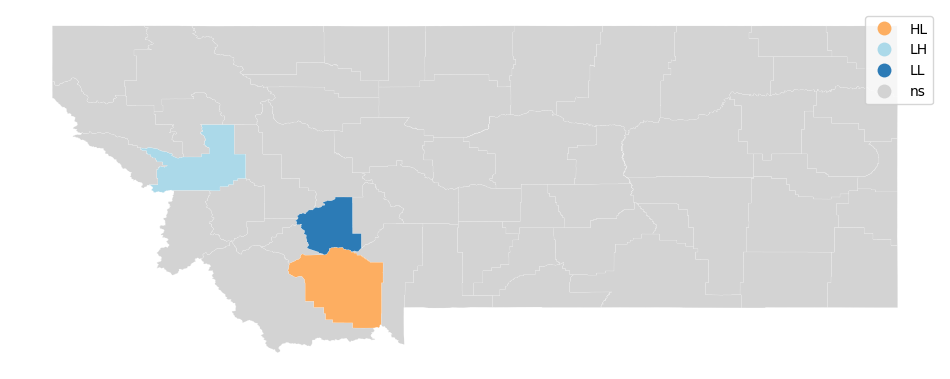

In [292]:
lisa_cluster(moran_loc = moran_local_20,
             gdf = MT_census_20_gdf,
             p = 0.05,
             figsize = (12,8))

(<Figure size 1200x800 with 1 Axes>, <Axes: >)

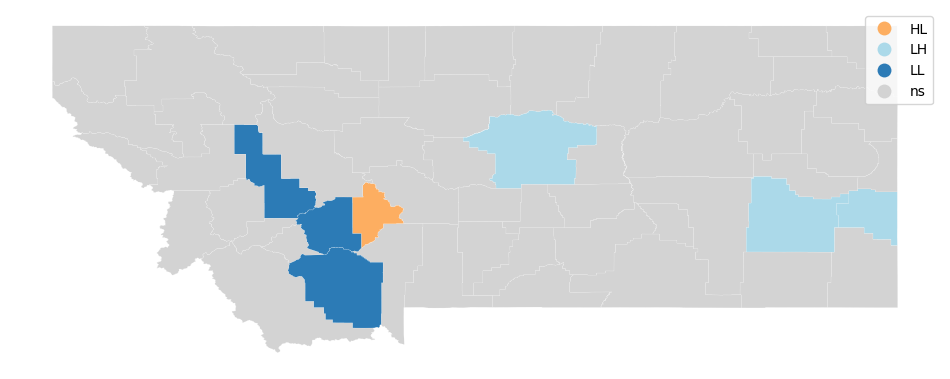

In [293]:
lisa_cluster(moran_loc = moran_local_24,
             gdf = MT_census_24_gdf,
             p = 0.05,
             figsize = (12,8))

## Final Maps and Analysis

In [261]:
# create a grid with the two user defined maps side by side as subplots
# if possible can I make them share a legend?